## MODELOS DE SERIES DE TIMPO PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Vamos a leer el csv de Demanda en sector eléctrico

In [2]:
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y')

In [3]:
demanda_electrico = pd.read_csv(R'Demanda_electrico_2022_full1.csv', parse_dates=[0], index_col=0, squeeze=true, date_parser=parser, encoding = 'utf-8')
demanda_electrico

C:\Users\sergi\AppData\Local\Temp\ipykernel_14944\2540285724.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  demanda_electrico = pd.read_csv(R'Demanda_electrico_2022_full1.csv', parse_dates=[0], index_col=0, squeeze=true, date_parser=parser, encoding = 'utf-8')


Date
2005-01-01    1819.58
2005-02-01    1895.33
2005-03-01    1765.86
2005-04-01    1642.70
2005-05-01    1895.54
               ...   
2022-05-01    3350.03
2022-06-01    3498.70
2022-07-01    3350.97
2022-08-01    3506.42
2022-09-01    3778.37
Name: Demanded_Gas, Length: 213, dtype: float64

Vamos a graficar los datos de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

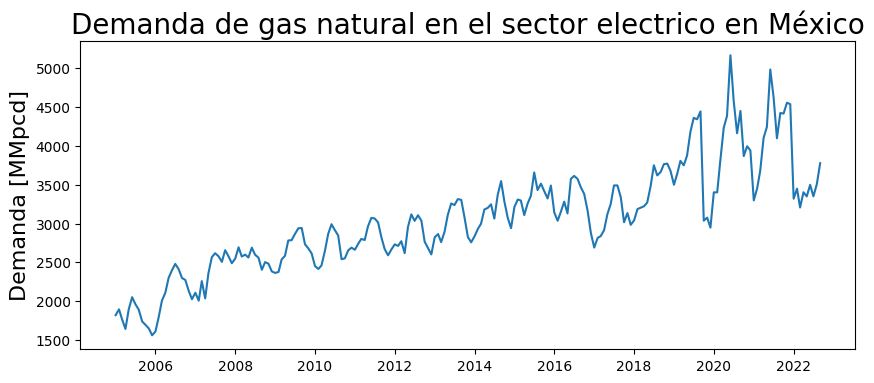

In [4]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico)
plt.title('Demanda de gas natural en el sector electrico en México', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se elaboran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México

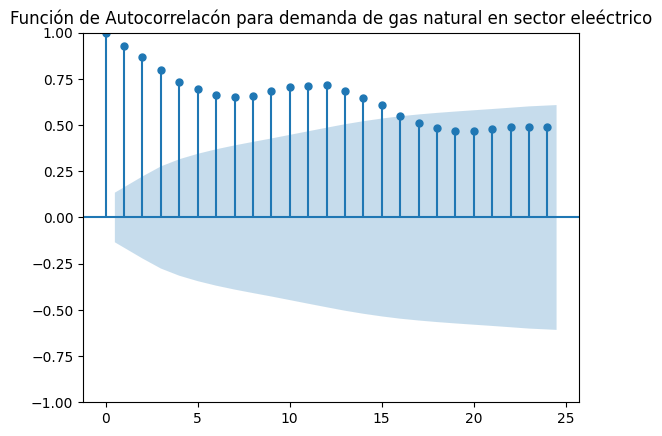

In [8]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico")

# Show the plot
plt.show()

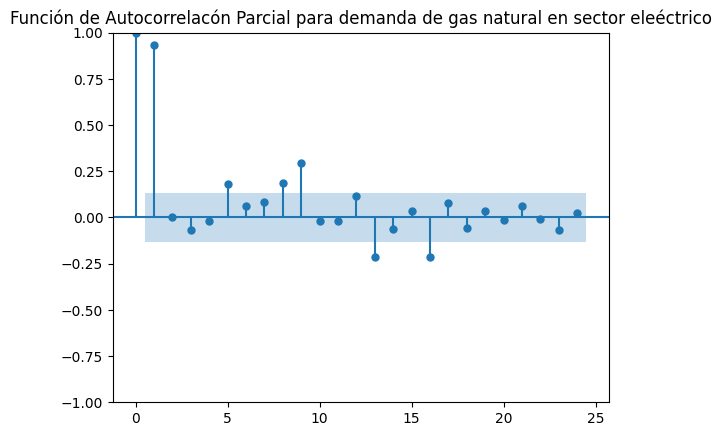

In [7]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie para lograr estacionariedad 

In [7]:
demanda_electrico_diff1 = demanda_electrico.diff()
demanda_electrico_diff1

Date
2005-01-01       NaN
2005-02-01     75.75
2005-03-01   -129.47
2005-04-01   -123.16
2005-05-01    252.84
               ...  
2022-05-01    -53.41
2022-06-01    148.67
2022-07-01   -147.73
2022-08-01    155.45
2022-09-01    271.95
Name: Demanded_Gas, Length: 213, dtype: float64

Se grafica la diferencia de demanda en el sector eléctrico 

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

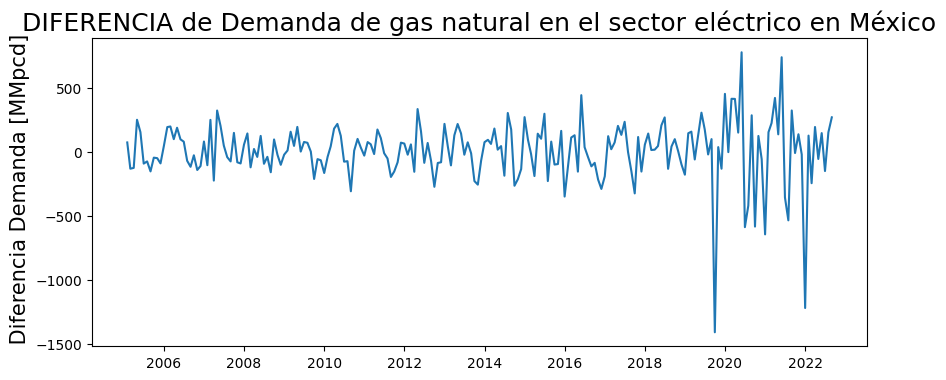

In [11]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_diff1)
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México', fontsize=18)
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

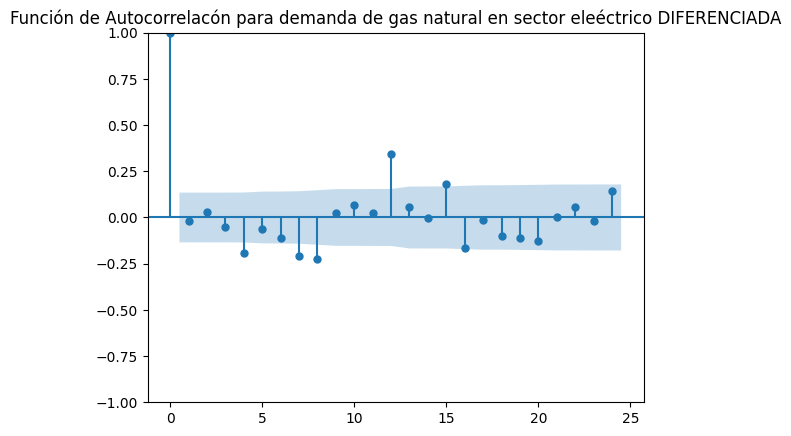

In [20]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

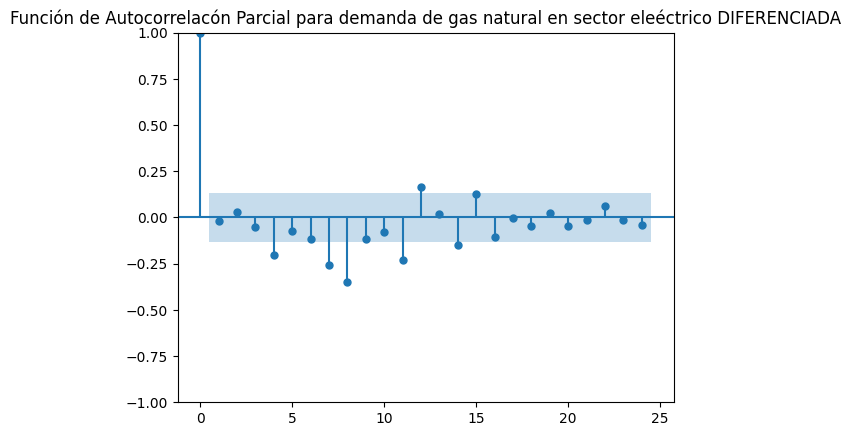

In [21]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [10]:
## Get training and testing sets 
demanda_electrico_train_end = datetime(2021,9,1)
demanda_electrico_test_end = datetime(2022,9,1)
##This means we are taking from 2005 to 2018 as traning data to predict 2019 and 2020

demanda_electrico_train_data = demanda_electrico[:demanda_electrico_train_end]
demanda_electrico_test_data = demanda_electrico[demanda_electrico_train_end+ timedelta(days=1):demanda_electrico_test_end]
demanda_electrico_test_data


Date
2021-10-01    4417.51
2021-11-01    4557.36
2021-12-01    4538.89
2022-01-01    3320.75
2022-02-01    3449.80
2022-03-01    3206.96
2022-04-01    3403.44
2022-05-01    3350.03
2022-06-01    3498.70
2022-07-01    3350.97
2022-08-01    3506.42
2022-09-01    3778.37
Name: Demanded_Gas, dtype: float64

APLIQUEMOS UN MODELO ARIMA A NUESTRA DATA DE DEMANDA DE GAS NATURAL EN SECTOR ELECTRICO

In [11]:

##Create the model
model_ARIMA_electrico = ARIMA (demanda_electrico_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_fit = model_ARIMA_electrico.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_fit.summary())



c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 0.648611307144165
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1333.396
Date:                Wed, 30 Aug 2023   AIC                           2684.793
Time:                        18:54:39   BIC                           2714.478
Sample:                    01-01-2005   HQIC                          2696.806
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8308      0.074     11.202      0.000       0.685       0.976
ar.L2         -0.4252      0.068     -6.294      0.000      -0.558      -0.293
ar.L3          

c:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en el sector electrico

In [13]:

##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico = model_ARIMA_electrico_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico)

2021-10-01    4116.919792
2021-11-01    3938.661142
2021-12-01    4075.783781
2022-01-01    3892.115780
2022-02-01    3786.677023
2022-03-01    4047.242794
2022-04-01    4032.864798
2022-05-01    3974.030171
2022-06-01    4246.932479
2022-07-01    4265.558507
2022-08-01    4126.053842
2022-09-01    4289.164033
Freq: MS, Name: predicted_mean, dtype: float64


Vamos a graficar las predicciones vs el real

Text(0, 0.5, 'Demanda [MMpcd]')

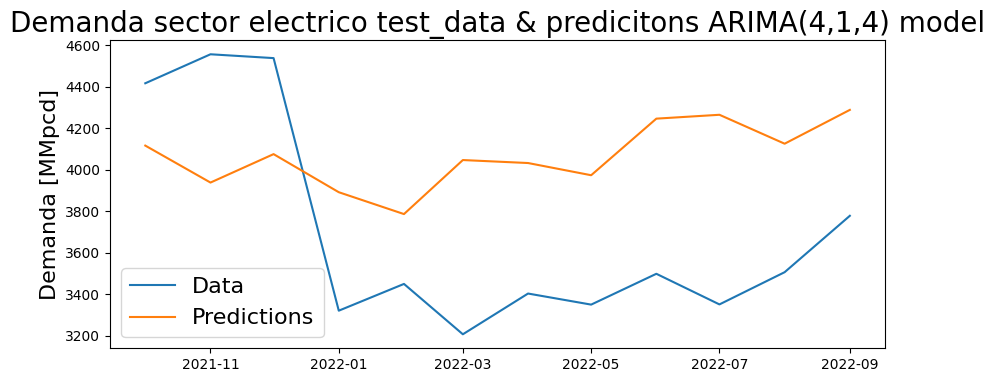

In [15]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_test_data)
plt.plot(predictions_model_ARIMA_electrico)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Intentando otro modelo ARIMA para la data de Demanda de Gas natural en sector eléctrico

In [19]:
##Create the model
model_ARIMA_electrico2 = ARIMA (demanda_electrico_train_data, order=(4,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_fit2 = model_ARIMA_electrico2.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_fit2.summary())

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

Model fitting time 0.43852829933166504
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1338.813
Date:                Wed, 30 Aug 2023   AIC                           2693.626
Time:                        19:37:54   BIC                           2720.013
Sample:                    01-01-2005   HQIC                          2704.305
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5336      0.115      4.648      0.000       0.309       0.759
ar.L2          0.7379      0.126      5.839      0.000       0.490       0.986
ar.L3        

In [20]:

##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico2 = model_ARIMA_electrico_fit2.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico2)

2021-10-01    4122.708761
2021-11-01    3986.777121
2021-12-01    3874.471411
2022-01-01    3808.597218
2022-02-01    3840.878683
2022-03-01    3906.437848
2022-04-01    4029.934236
2022-05-01    4141.576311
2022-06-01    4247.005217
2022-07-01    4299.219608
2022-08-01    4311.307112
2022-09-01    4269.120169
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

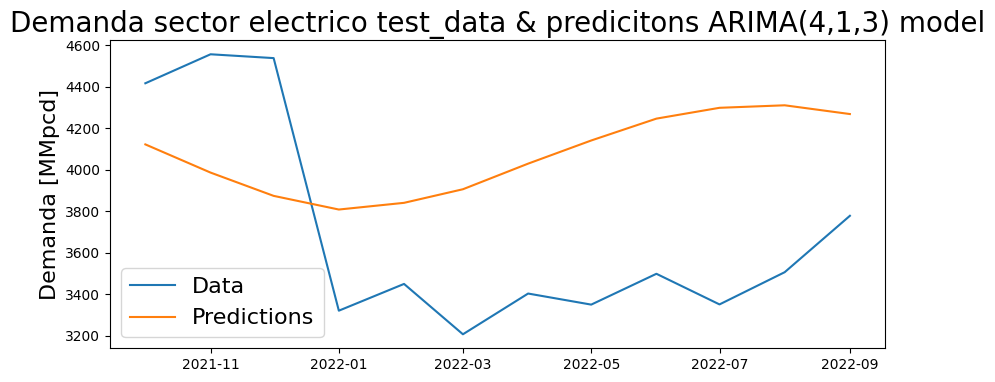

In [21]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_test_data)
plt.plot(predictions_model_ARIMA_electrico2)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

### Proceso de AJUSTE de datos para mejora de modelos ARIMA 

In [72]:
demanda_electrico_xls = pd.read_excel(R'Demanda_electrico_2022_full1.xlsx')
demanda_electrico_xls

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


In [73]:
demanda_electrico_xls.columns

Index(['Date', 'Demanded_Gas'], dtype='object')

In [76]:
demanda_electrico_xls["Date"]  = pd.to_datetime(demanda_electrico_xls['Date']) 
demanda_electrico_xls["Date"].dtype

dtype('<M8[ns]')

In [66]:
demanda_electrico_xls.set_index('Date', inplace=True)

In [67]:
# Now slice using datetimes
demanda_electrico_train_end = datetime(2021,9,1)
demanda_electrico_test_end = datetime(2022,9,1)

demanda_electrico_xls_train_data = demanda_electrico_xls[:demanda_electrico_train_end]
demanda_electrico_xls_test_data = demanda_electrico_xls[demanda_electrico_train_end+timedelta(days=1):demanda_electrico_test_end]
demanda_electrico_xls_test_data


,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


In [68]:
# Calculate Q1 and Q3
Q1_demanda_electrico_xls_train_data = demanda_electrico_xls_train_data.quantile(0.25)
Q3_demanda_electrico_xls_train_data = demanda_electrico_xls_train_data.quantile(0.75)
IQR_demanda_electrico_xls_train_data = Q3_demanda_electrico_xls_train_data - Q1_demanda_electrico_xls_train_data
IQR_demanda_electrico_xls_train_data


Demanded_Gas    773.19
dtype: float64

In [70]:
# Identify outliers
outliers_demanda_electrico_xls_train_data = demanda_electrico_xls_train_data[(demanda_electrico_xls_train_data < (Q1_demanda_electrico_xls_train_data - 1.5 * IQR_demanda_electrico_xls_train_data)) | (demanda_electrico_xls_train_data > (Q3_demanda_electrico_xls_train_data + 1.5 * IQR_demanda_electrico_xls_train_data))]
print("Outliers:")
print(outliers_demanda_electrico_xls_train_data)

Outliers:
            Demanded_Gas
Date                    
2005-01-01           NaN
2005-02-01           NaN
2005-03-01           NaN
2005-04-01           NaN
2005-05-01           NaN
...                  ...
2021-05-01           NaN
2021-06-01       4985.53
2021-07-01       4631.85
2021-08-01           NaN
2021-09-01           NaN

[201 rows x 1 columns]


In [85]:
for date, value in outliers_demanda_electrico_xls_train_data.iteritems():
    month_str = date
print(month_str)

Demanded_Gas


C:\Users\sergi\AppData\Local\Temp\ipykernel_14944\4200969244.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in outliers_demanda_electrico_xls_train_data.iteritems():


In [87]:
print(month_str)

Demanded_Gas


In [77]:
# Handle outliers by replacing with historical monthly average
for date, value in outliers_demanda_electrico_xls_train_data.iteritems():
    month_str = date.split('-')[1] 
    month = int(month_str)
    historical = outliers_demanda_electrico_xls_train_data[outliers_demanda_electrico_xls_train_data.index.month == month]
    monthly_avg = historical.mean()
    demanda_electrico_xls_train_data.loc[date] = monthly_avg
    
print("Time series with outliers handled:") 
print(demanda_electrico_xls_train_data)

C:\Users\sergi\AppData\Local\Temp\ipykernel_14944\1284463528.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in outliers_demanda_electrico_xls_train_data.iteritems():


IndexError: list index out of range

In [28]:
demanda_electrico_train_data_MAX = demanda_electrico_train_data.max()
demanda_electrico_train_data_MAX

5168.27

In [29]:
demanda_electrico_train_data_MIN = demanda_electrico_train_data.min()
demanda_electrico_train_data_MIN

1560.98

In [42]:
import pandas as pd
import numpy as np

# Load time series data into Pandas DataFrame
df_demanda_electrico_train_data = pd.DataFrame(demanda_electrico_train_data) 
df_demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


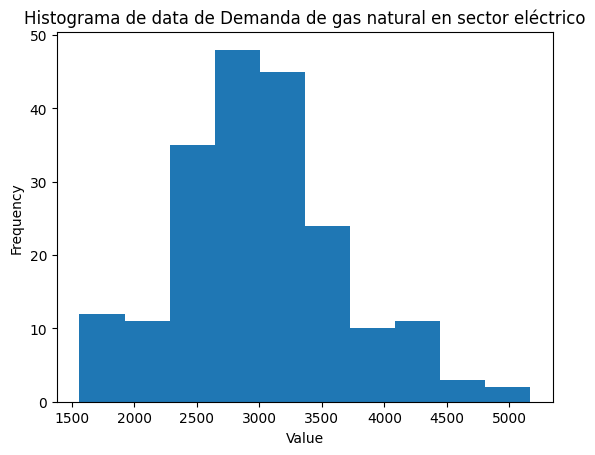

In [47]:
# Generate the histogram
plt.hist(df_demanda_electrico_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico')

# Display the plot
plt.show()

In [37]:
print(df_demanda_electrico_train_data.columns)

Index(['Demanded_Gas'], dtype='object')


In [40]:
# Create new Date column from existing Demanded_Gas column 
df_demanda_electrico_train_data['Date'] = pd.to_datetime(df_demanda_electrico_train_data['Demanded_Gas'])


In [36]:
# Add datetime index 
df_demanda_electrico_train_data['Date'] = pd.to_datetime(df_demanda_electrico_train_data['Date'])


KeyError: 'Date'